# Qubism Visualization

This note describes plotting functions `plot_schmidt` and `plot_qubism`, and additionally - `complex_array_to_rgb`, along with their applications.

In [1]:
%pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 60.7 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (Qobj, about, complex_array_to_rgb, jmat, ket, plot_qubism,
                   plot_schmidt, qeye, sigmax, sigmay, sigmaz, tensor)

%matplotlib inline

## Colors

In quantum mechanics, complex numbers are as natual as real numbers.

Before going into details of particular plots, we show how `complex_array_to_rgb` maps $z=x+iy$
 into colors. There are two variants, `theme='light'` and `theme='dark'`. For both, we use hue for phase, with red for positive numbers and aqua for negative.

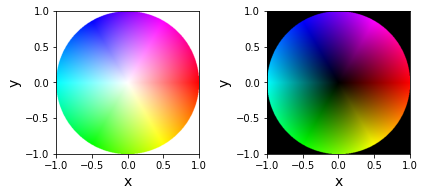

In [3]:
compl_circ = np.array(
    [
        [(x + 1j * y) if x ** 2 + y**2 <= 1 else 0j
            for x in np.arange(-1, 1, 0.005)]
        for y in np.arange(-1, 1, 0.005)
    ]
)

fig = plt.figure(figsize=(6, 3))
for i, theme in enumerate(["light", "dark"]):
    ax = plt.subplot(1, 2, i + 1)
    ax.set_xlabel("x", fontsize=14)
    ax.set_ylabel("y", fontsize=14)
    ax.imshow(
        complex_array_to_rgb(compl_circ, rmax=1, theme=theme),
        extent=(-1, 1, -1, 1)
    )
plt.tight_layout()

## Visualizing commplex-valued functions with Matplotlib and Mayavi Domain coloring method

The study of complex-valued functions is a difficult chapter of mathematics for most students. Usually textbooks do not show up any figure to visualize in some way such functions.

------

When studying real functions of one or two variables, an intuitive grasp of some properties one acquires looking at their graphs. Unlike real functions of one or two variables, whose graphs are curves in $\mathbb{R}^2$
, respectively surfaces in $\mathbb{R}^3$
, the graph of a complex function, $f:\mathbb{C}→\mathbb{C}$
, lies in $\mathbb{R}^4$
. Visualization in four dimensions is a difficult task and the method employed depends on the "geometry" of the object to be visualized.


-----


Fortunately, the development of cylindrical color models, such as HSL and HSV, and the possibility to express the values $f(z)$
 of a complex function in polar coordinates, $f(z)=|f(z)|exp(\iota arg(f(z))$
, led to the design of a fruitful technique of visualization of the values of a complex function through a color-coding method. This method is called domain coloring.

## RGB and HSV color model

The RGB (Red, Green, Blue) is the basic color space. Its geometrical model is the unit cube. Each color is represented as a triple (r,g,b)
 of real numbers in [0,1]
, where r,g,b
 are quantities of the primary colors (red, green and blue) contained by that color.

![](http://www.blackice.com/images/RGB_Cube.jpg)

Computers treat colors in RGB format. However in applications it is much more appropriate to use the HSV color model, because colors in this space are specified in the same way the humans perceive the color, namely giving the hue, saturation and brightness.

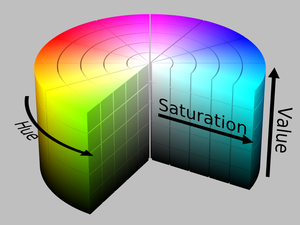

The HSV model is represented by a solid cylinder having the radius $1$
, and height $1$. $H$
 is the hue, $S$
, saturation, and $V$
 represents the brightness.

-----

Sectioning this cylinder with a plane perpendicular to its vertical axis, at the height $V=v$
, one gets a color wheel whose complex parameterization is $z=Se^{2πiH}$
.

-----

As hue $H$
 varies from $0$ to $1$, the corresponding colors vary in this color wheel such that at 2πH
, with $H∈{0,1/6,1/3,1/2,2/3,5/6,1}$
 are located respectively the colors red, yellow, green, cyan, blue, magenta, and red again (see the next image).


-----

Saturation represents the purity of colors. For $S=1$
 all colors are pure (do not contain white). As $S$
 decreases the colors look more fade.

The brightness increases from zero to $1$. At $V=0$
, all colours look dark.

-----

The images below illustrate the color wheels of brightness $V=1$
, respectively $V=0.5$
.

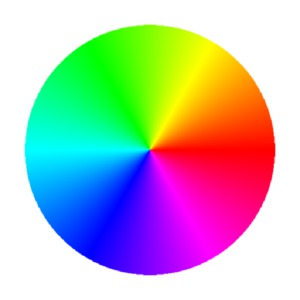

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb

Let us get new insights into the HSV model.

In order to see how the color brightness varies in a cylindrical surface of constant saturation, we generate the colors in a rectangle obtained by cutting that cylindrical surface along the generatrice of angular coordinate, $H=0$
:

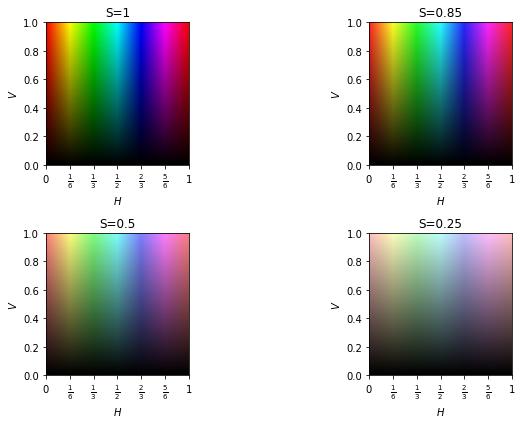

In [5]:
plt.rcParams['figure.figsize'] = 10, 6
sat = [1.0, 0.85, 0.5, 0.25]
svals = ['S=1', 'S=0.85', 'S=0.5', 'S=0.25']
for k, s in zip(range(4), sat):
    V, H = np.mgrid[0:1:200j, 0:1:200j]
    S = s * np.ones(H.shape)  
    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    plt.subplot(2,2,k+1)
    plt.imshow(RGB, origin="lower", extent=[0, 1, 0, 1])
    plt.xticks([0, 1/6, 1/3, 1/2,  2/3, 5/6, 1],
    ['$0$', r'$\frac{1}{6}$', r'$\frac{1}{3}$', r'$\frac{1}{2}$', r'$\frac{2}{3}$',
     r'$\frac{5}{6}$', '$1$'])
    plt.xlabel("$H$")
    plt.ylabel("$V$")
    plt.title(svals[k])
plt.tight_layout() 

These images suggest that the points of a subset $D$
 of the complex plane can be encoded by the colors in a rectangle of constant saturation, $S=s_0 ∈ [0,1]$
. Namely, to each $z ∈ D$
 one associates the triple $(h,s_0,v)$
 in the HSV cylinder, where $h=((arg(z)/2π+1) \text{ modulo }1$
, and $v=g(|z|)$
.

$arg(z)∈(−π,π]$
 is the principal argument of $z$
, and $g:[0,∞)→[0,1)$
 is a strictly increasing function, chosen such that to be rapidly increasing near zero, in order to avoid too dark colors in the resulting image.

After a few experiments we chose this function:

In [6]:
def g(x):
    return (1- 1/(1+x**2))**0.2   

Its graph compared with those of other functions of the same type are illustrated here:

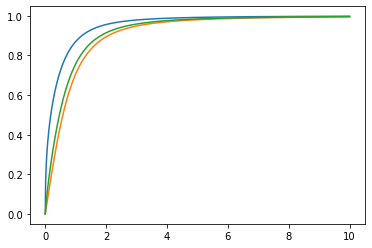

In [7]:
plt.rcParams['figure.figsize'] = (6, 4)
x = np.linspace(0, 10, 1000)
y = g(x)
f = lambda z: (1 - 1/(1+z**2))**0.5
h = lambda z: (1.-1/(1+z**2))**0.4
plt.plot(x,y)
plt.plot(x, f(x))
plt.plot(x, h(x))

The two color models, RGB and HSV, can be converted from one to another. There is no closed form formula for such a conversion. It is only described algorithmically. Here is the pseudocode for the conversion HSV to RGB, and here for RGB to HSV.

------

The Python module colorsys provides functions for these conversions:

$(r, g, b) = colorsys.hsv_to_rgb(h, s, v),$

respectively

$(h, s, v) = colorsys.rgb_to_hsv(r, g, b)$

Coordinates of the triples $(r, g, b)$, and $(h, s, v)$, are floating point numbers in $[0,1]$
. The hue=$h$ represents the color located at the angular value $2πh$
 in the color wheel.
 
 ----

For our purposes it is much more useful the function `hsv_to_rgb` from `matplotlib.colors`, that converts a numpy array of shape $(m, n, 3)$, and entries in $[0,1]$
, defining a HSV colored image, to an array of the same shape, interpreted as a RGB image.

Let us color-encode the points of the rectangular region 
$$D={x+iy∈C|x∈[−1,4],y∈[−1,3]}$$
.

In [8]:
def Hcomplex(z):# computes the hue corresponding to the complex number z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)

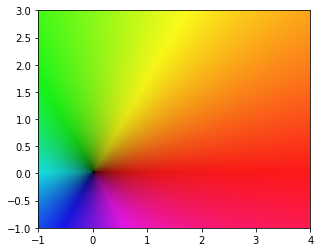

In [9]:
x = np.arange(-1,4, 0.05)
y = np.arange(-1,3, 0.05)
x, y = np.meshgrid(x,y)
z = x + 1j*y
H = Hcomplex(z)
V = g(np.absolute(z))
S = 0.9*np.ones(H.shape)
HSV = np.dstack((H, S, V))
RGB = hsv_to_rgb(HSV)
plt.imshow(RGB, origin="lower", extent=[-1, 4, -1, 3])

## Classical Domain coloring method

Domain Coloring as a method of visualization of complex functions, gained popularity after the publication of the review by F. Farris for the T Needham' book, Visual complex analysis.

----

In order to visualize a complex function f
 defined on a rectangular region $[a,b]×[c,d] ⊂ C$
, and taking values in the extended complex plane, $C=C∪{∞}$
, one proceeds as follows:

-----

One defines a narrow grid of this rectangle.

Each node $z$
 of the grid will be colored with the HSV color $(h,s0,v)$
, where $h$
 and $v$
 encode the argument and the modulus of $f(z)$
, as described above.

The points $z$
 for which $|f(z)|=∞$
 could be colored with white (white is represented by the triple $(r,g,b)=(1,1,1)$, and its conversion to HSV is $(0,0,1))$.


-------

If we denote by col:$C→HSV$
 the function which encodes the points in the extended complex plane, by a triplet $(h,s,v)$
, then the domain coloring is represented by the map $z↦f(z)↦col(f(z))$
, i.e. to the point $z$
 in the domain one associates the color-code of $f(z)$
.

In [10]:
def func_vals(f, re, im,  N): #evaluates the complex function at the nodes of the grid
    # re and im are  tuples, re=(a, b) and im=(c, d), defining the rectangular region
    # N is the number of discrete points per unit interval 
    
    l = re[1]-re[0]
    h = im[1]-im[0]
    resL = N * l # horizontal resolution
    resH = N * h # vertical resolution
    x = np.linspace(re[0], re[1], int(resL))
    y = np.linspace(im[0], im[1], int(resH))
    x, y = np.meshgrid(x,y)
    z = x + 1j*y
    return f(z)

In [11]:
def domaincol_c(w, s):#Classical domain coloring
    # w is the  array of values f(z)
    # s is the constant saturation
    
    H = Hcomplex(w)
    S = s * np.ones(H.shape)
    modul = np.absolute(w)
    V = (1.0-1.0/(1+modul**2))**0.2
    # the points mapped to infinity are colored with white; hsv_to_rgb(0, 0, 1)=(1, 1, 1)=white

    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    return RGB

In [12]:
def plot_domain(color_func, f,   re=[-1,1], im= [-1,1], title='',
                s=0.9, N=200, daxis=None):
    w = func_vals(f, re, im, N)
    domc = color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
       
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

In order to read-off some properties of a function $f$
, encoded in the generated image, we display alongside the color-code of the complex plane

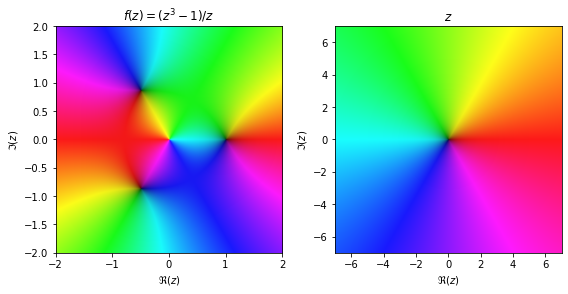

In [13]:
plt.rcParams['figure.figsize'] = 8, 5
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
f = lambda z: (z**3 - 1)/z
plot_domain(domaincol_c, f, re=ab, im= cd, title='$f(z)=(z^3-1)/z$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_c, lambda z:z, re=[-7, 7], im=[-7, 7], title='$z$', daxis=True)
plt.tight_layout() 

## Schmidt Plot
Arguably, the easiest way to show entanglement is to plot a wavefunction against two variables. If the plot is a product of them, the state is a product state. If not - it is entangled.

As writing a wavefunction as a matrix $|ψ⟩_{ij}$
 is the the crucial step in Schmidt decomposition, we call such plots Schmidt plots.

Let us consider two states:

1. $|\psi^-\rangle = (|01\rangle - |10\rangle)/\sqrt{2}
$

2. $(|01\rangle - |00\rangle)/\sqrt{2}
$


In [22]:
singlet = (ket("01") - ket("10")).unit()
separable = (ket("01") - ket("00")).unit()

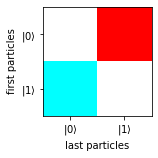

In [23]:
plot_schmidt(singlet, figsize=(2, 2));

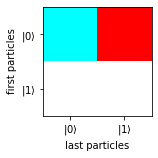

In [24]:
plot_schmidt(separable, figsize=(2, 2));

As we see, for separable state the plot is a product of $x$ and $y$ coordinates, while for the singlet state - is is not.

Let us now consider a product of two singlet states:$|ψ^−⟩|ψ^−⟩$
. Schmidt plot, by default, makes spliting of equal numbers of particles.

(And just for fun, let's multiply it by the imaginary unit, to get diffeerent colors.)

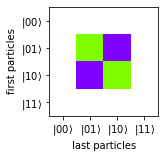

In [25]:
plot_schmidt(1j * tensor([singlet, singlet]), figsize=(2, 2));

As we see, we have a product, as the state is a product state with the respect to the splitting of first 2 vs last 2 particles.

But what if we shift particles, getting $|ψ^−⟩_{23}|ψ^−⟩_{41}
?$

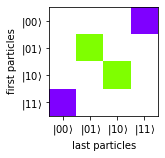

In [26]:
plot_schmidt(1j * tensor([singlet, singlet]).permute([1, 2, 3, 0]),
             figsize=(2, 2));

So we see that it is entangled.

plot_schmidt allows us to specify other splittings. With parameter splitting we decide how many particles we want to have as columns. In general, we can plot systems of various numbers of particles, each being of a different dimension.

For example:

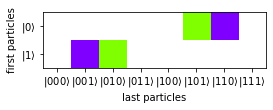

In [27]:
plot_schmidt(
    1j * tensor([singlet, singlet]),
    splitting=1,
    labels_iteration=(1, 3),
    figsize=(4, 2),
);

## Qubism Plot

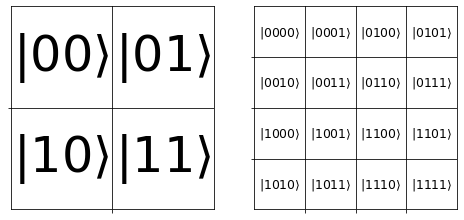

In [28]:
fig = plt.figure(figsize=(8, 4))
for i in [1, 2]:
    ax = plt.subplot(1, 2, i)
    plot_qubism(0 * ket("0000"), legend_iteration=i, grid_iteration=i,
                fig=fig, ax=ax)

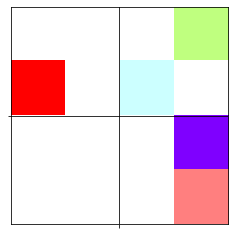

In [29]:
state = (
    ket("0010")
    + 0.5 * ket("1111")
    + 0.5j * ket("0101")
    - 1j * ket("1101")
    - 0.2 * ket("0110")
)
plot_qubism(state, figsize=(4, 4));

Or if we want to make sure how did we map amplitudes to particular regions in the plot:

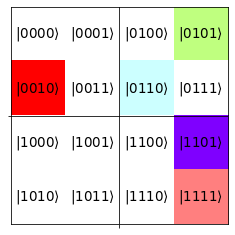

In [30]:
plot_qubism(state, legend_iteration=2, figsize=(4, 4));

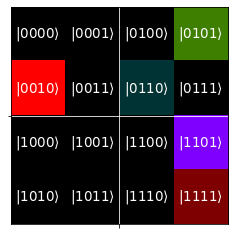

In [31]:
plot_qubism(state, legend_iteration=2, theme="dark", figsize=(4, 4));

The most important property of Qubism is the recursive structure. So that we can add more particles seamlessly. For example, let's consider a plot of $k$ copies of the singlet states, i.e. $|ψ^−⟩^{⊗k}$
:

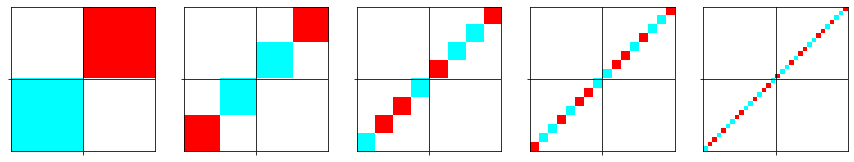

In [32]:
fig = plt.figure(figsize=(15, 3))
for k in range(1, 6):
    ax = plt.subplot(1, 5, k)
    plot_qubism(tensor([singlet] * k), fig=fig, ax=ax)

OK, but once we can type the wavefunction by hand, plots offer little added value.

Let's see how we can plot ground states. Before doing that, we define some functions to easy make a translationally-invariant Hamiltonian.

In [33]:
def spinchainize(op, n, bc="periodic"):

    if isinstance(op, list):
        return sum([spinchainize(each, n, bc=bc) for each in op])

    k = len(op.dims[0])
    d = op.dims[0][0]

    expanded = tensor([op] + [qeye(d)] * (n - k))

    if bc == "periodic":
        shifts = n
    elif bc == "open":
        shifts = n - k + 1

    shifteds = [
        expanded.permute([(i + j) % n for i in range(n)])
        for j in range(shifts)
    ]

    return sum(shifteds)


def gs_of(ham):
    gval, gstate = ham.groundstate()
    return gstate

Let us consider Hamiltonian for $N$ particles

$$H = \sum_{i=1}^N \vec{S}_i \cdot \vec{S}_{i+1} + J \sum_{i=1}^N \vec{S}_i \cdot \vec{S}_{i+2},
$$

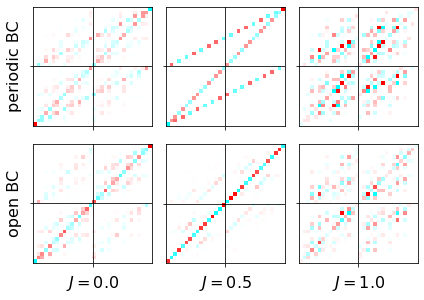

In [34]:
heis = sum([tensor([pauli] * 2) for pauli in [sigmax(), sigmay(), sigmaz()]])
heis2 = sum(
    [tensor([pauli, qeye(2), pauli])
     for pauli in [sigmax(), sigmay(), sigmaz()]]
)

N = 10
Js = [0.0, 0.5, 1.0]

fig = plt.figure(figsize=(2 * len(Js), 4.4))

for b in [0, 1]:
    for k, J in enumerate(Js):
        ax = plt.subplot(2, len(Js), b * len(Js) + k + 1)

        if b == 0:
            spinchain = spinchainize([heis, J * heis2], N, bc="periodic")
        elif b == 1:
            spinchain = spinchainize([heis, J * heis2], N, bc="open")

        plot_qubism(gs_of(spinchain), ax=ax)

        if k == 0:
            if b == 0:
                ax.set_ylabel("periodic BC", fontsize=16)
            else:
                ax.set_ylabel("open BC", fontsize=16)
        if b == 1:
            ax.set_xlabel("$J={0:.1f}$".format(J), fontsize=16)

plt.tight_layout()

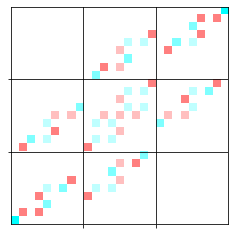

In [35]:
ss = sum([tensor([jmat(1, s)] * 2) for s in ["x", "y", "z"]])
H = spinchainize([ss, (1.0 / 3.0) * ss**2], n=6, bc="periodic")
plot_qubism(gs_of(H), figsize=(4, 4));

Qubism for qutrits works similarly as for qubits:

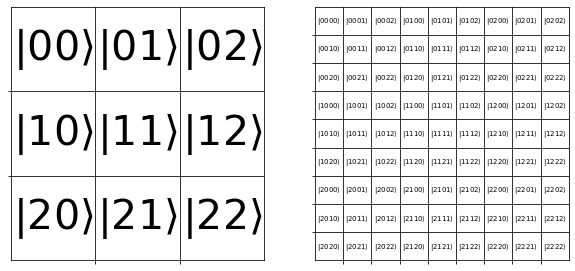

In [36]:
fig = plt.figure(figsize=(10, 5))
for i in [1, 2]:
    ax = plt.subplot(1, 2, i)
    plot_qubism(
        0 * ket("0000", dim=3), legend_iteration=i, grid_iteration=i,
        fig=fig, ax=ax
    )

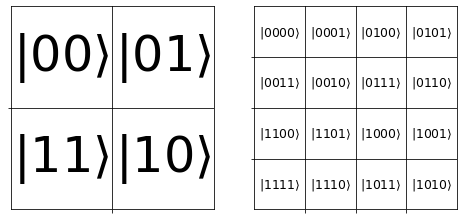

In [37]:
fig = plt.figure(figsize=(8, 4))
for i in [1, 2]:
    ax = plt.subplot(1, 2, i)
    plot_qubism(
        0 * ket("0000"),
        how="pairs_skewed",
        legend_iteration=i,
        grid_iteration=i,
        fig=fig,
        ax=ax,
    )

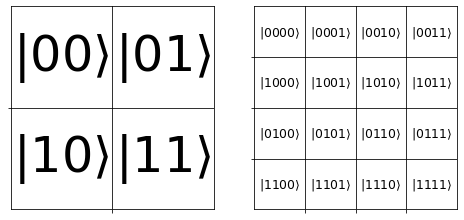

In [38]:
fig = plt.figure(figsize=(8, 4))
for i in [1, 2]:
    ax = plt.subplot(1, 2, i)
    plot_qubism(
        0 * ket("0000"),
        how="before_after",
        legend_iteration=i,
        grid_iteration=i,
        fig=fig,
        ax=ax,
    )

$$ H = \sum_{i=1}^N \vec{S}_i \cdot \vec{S}_{i+1}
 $$

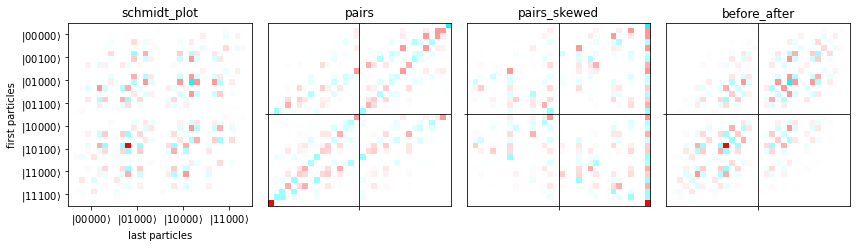

In [39]:
heis = sum([tensor([pauli] * 2) for pauli in [sigmax(), sigmay(), sigmaz()]])
N = 10
gs = gs_of(spinchainize(heis, N, bc="periodic"))

fig = plt.figure(figsize=(12, 4))
for i, how in enumerate(["schmidt_plot", "pairs",
                         "pairs_skewed", "before_after"]):
    ax = plt.subplot(1, 4, i + 1)
    if how == "schmidt_plot":
        plot_schmidt(gs, fig=fig, ax=ax)
    else:
        plot_qubism(gs, how=how, fig=fig, ax=ax)
    ax.set_title(how)
plt.tight_layout()

## Seeing Entanglement



In [40]:
product_1 = ket("0000")
product_2 = tensor([(ket("0") + ket("1")).unit()] * 4)
w = (ket("0001") + ket("0010") + ket("0100") + ket("1000")).unit()
dicke_2of4 = (
    ket("0011") + ket("0101") + ket("0110") +
    ket("1001") + ket("1010") + ket("1100")
).unit()
ghz = (ket("0000") + ket("1111")).unit()

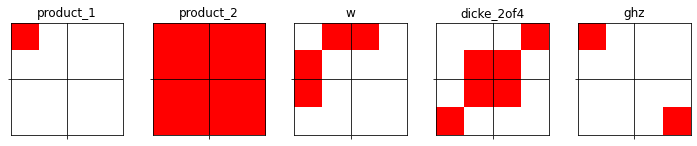

In [41]:
states = ["product_1", "product_2", "w", "dicke_2of4", "ghz"]
fig = plt.figure(figsize=(2 * len(states), 2))
for i, state_str in enumerate(states):
    ax = plt.subplot(1, len(states), i + 1)
    plot_qubism(eval(state_str), fig=fig, ax=ax)
    ax.set_title(state_str)
plt.tight_layout()

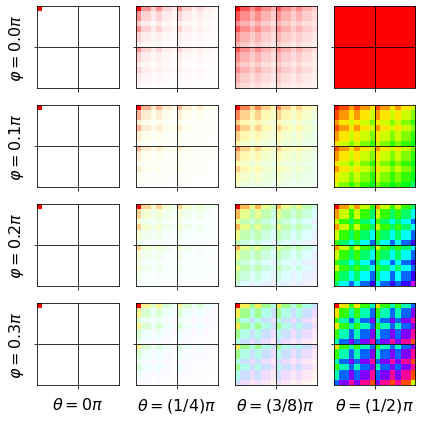

In [42]:
def product_state(theta, phi=0, n=1):
    single = Qobj([[np.cos(theta / 2.0)],
                   [np.sin(theta / 2.0) * np.exp(1j * phi)]])
    return tensor([single] * n)


thetas = 0.5 * np.pi * np.array([0.0, 0.5, 0.75, 1.0])
phis = np.pi * np.array([0.0, 0.1, 0.2, 0.3])

fig, axes2d = plt.subplots(nrows=len(phis),
                           ncols=len(thetas), figsize=(6, 6))

for i, row in enumerate(axes2d):
    for j, cell in enumerate(row):
        plot_qubism(
            product_state(thetas[j], phi=phis[i], n=8),
            grid_iteration=1, ax=cell
        )
        if i == len(axes2d) - 1:
            cell.set_xlabel(
                r"$\theta={0:s}\pi$".format(
                    ["0", "(1/4)", "(3/8)", "(1/2)"][j]),
                fontsize=16,
            )
        if j == 0:
            cell.set_ylabel(
                r"$\varphi={0:.1f}\pi$".format(phis[i] / np.pi), fontsize=16
            )

plt.tight_layout()

## Software versions

In [43]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1
Numpy Version:      1.21.6
Scipy Version:      1.7.3
Cython Version:     0.29.33
Matplotlib Version: 3.2.2
Python Version:     3.8.10
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /usr/local/lib/python3.8/dist-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qut